In [ ]:
!python -m pip install --upgrade pip

!pip install tensorflow==2.3.1 

!pip install tensorboard==2.4.1
!pip install torch  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 18.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 74.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch 
from IPython.display import Image 

In [ ]:
# clone official yolov5 github repository
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14465, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 14465 (delta 59), reused 63 (delta 40), pack-reused 14371
Receiving objects: 100% (14465/14465), 13.59 MiB | 10.50 MiB/s, done.
Resolving deltas: 100% (9960/9960), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.8 MB/s eta 0:00:00


In [ ]:
import os
from random import choice
import shutil

images =[]
xmls =[]

trainPath = '/content/yolov5/dataset/images/train'
valPath = '/content/yolov5/dataset/images/val'
crsPath = '/content/yolov5/data/ts/'

trainRatio = 0.8
valRatio = 0.2

totalImageCount = len(os.listdir(crsPath))/2

for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            images.append(filename)

TrainCount = int(len(images)*trainRatio)
ValCount = int(len(images)*valRatio)
print("training images are : ",TrainCount)
print("Validation images are : ",ValCount)

training images are :  158
Validation images are :  39


In [ ]:
#Divide custom data set in two parts- validation and training. Validation datasets can be 
#used for early stop regularization by stopping training when the error in the validation 
#dataset increases, as this is a sign of overfitting to the training dataset.

trainimagePath = '/content/yolov5/dataset/images/train'
trainlabelPath = '/content/yolov5/dataset/labels/train'
valimagePath = '/content/yolov5/dataset/images/val'
vallabelPath = '/content/yolov5/dataset/labels/val'
for x in range(TrainCount):

    fileInJpg = choice(images) 
    fileInXml = fileInJpg[:-4] +'.txt'

    shutil.copy(os.path.join(crsPath, fileInJpg), os.path.join(trainimagePath, fileInJpg))
    shutil.copy(os.path.join(crsPath, fileInXml), os.path.join(trainlabelPath, fileInXml))

    images.remove(fileInJpg)
    xmls.remove(fileInXml)
  
for x in range(ValCount):

    fileInJpg = choice(images)
    fileInXml = fileInJpg[:-4] +'.txt'

    shutil.copy(os.path.join(crsPath, fileInJpg), os.path.join(valimagePath, fileInJpg))
    shutil.copy(os.path.join(crsPath, fileInXml), os.path.join(vallabelPath, fileInXml))

    images.remove(fileInJpg)
    xmls.remove(fileInXml)

shutil.move(crsPath, valPath) 

'/content/yolov5/dataset/images/val/ts'

In [ ]:
# By running train.py, we can train the YOLO v5 model on our dataset 
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-31-g443ef7f Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

In [ ]:
#By running detect.py, we can detect  object from the images. 
!python detect.py --source runs/train/exp/00217.jpg --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=runs/train/exp/00217.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-31-g443ef7f Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/runs/train/exp/00217.jpg: 384x640 1 speed limit, 11.7ms
Speed: 0.5ms pre-process, 11.7ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


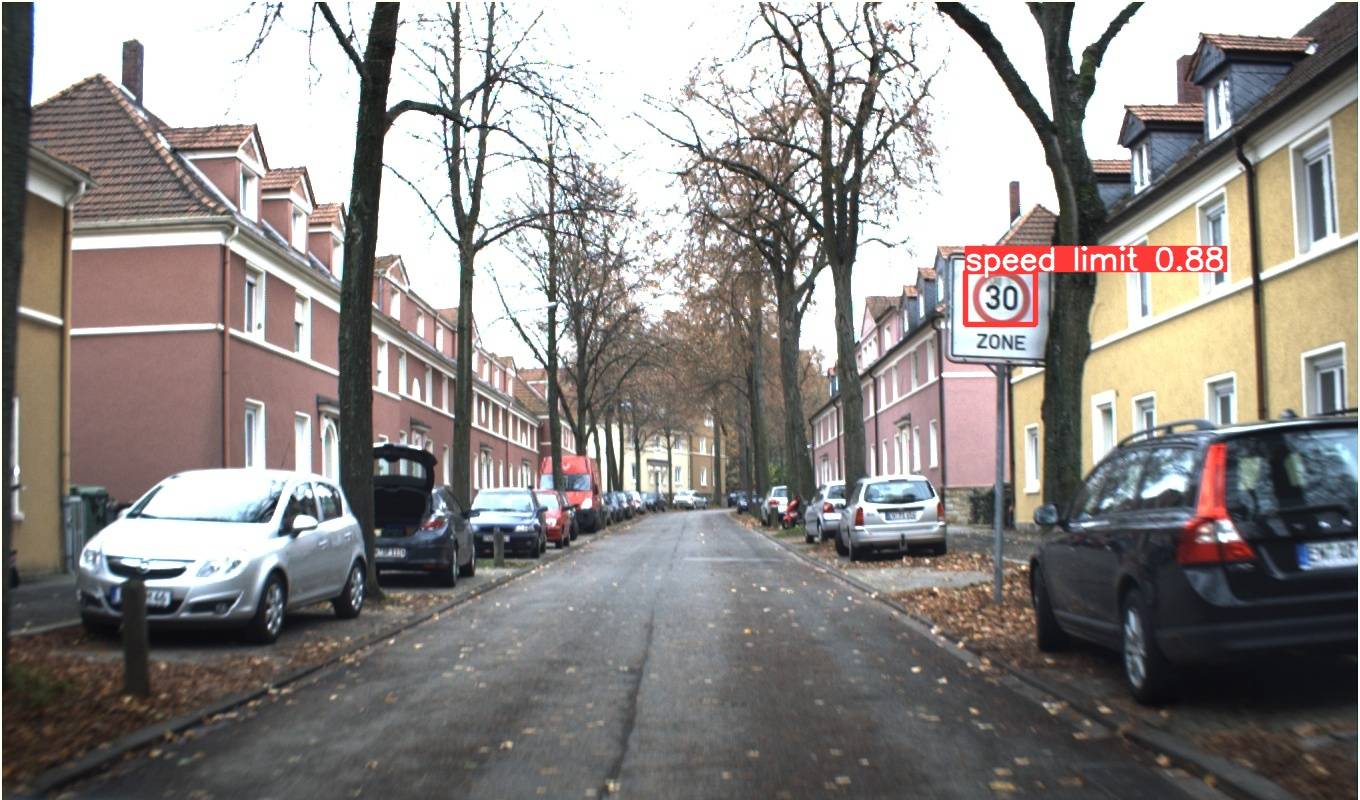

In [ ]:
Image(filename='runs/detect/exp2/00217.jpg', width=416)